# Compare a couple of network architectures to focus on one

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## Load results

In [4]:
dqn_64_64, dqn_128_64, dqn_64_64_64, dqn_128_64_64 = [
    pd.read_csv(f'../experiments/{experiment}/scores.csv')
    for experiment in ['dqn_64_64', 'dqn_128_64', 'dqn_64_64_64', 'dqn_128_64_64']]

## Comparison graphs
We smoothen the values of the scores with a window of 100 and compare:
- How early the environment is solved
- How high the score converges

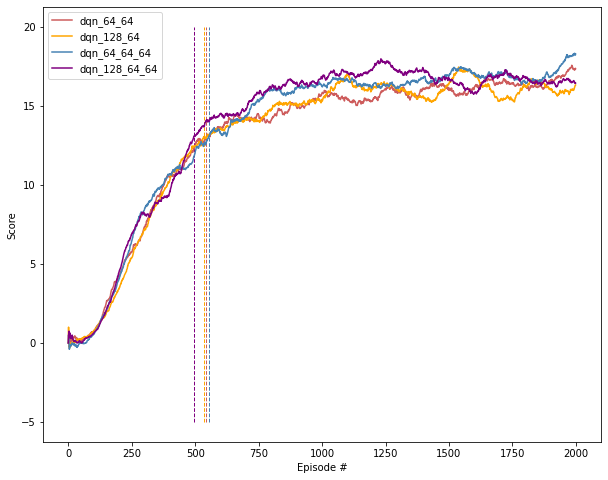

In [27]:
plt.figure(figsize=(10, 8))
plt.xlabel('Episode #')
plt.ylabel('Score')

for scores, name, color in [
    [dqn_64_64, 'dqn_64_64', 'indianred'], 
    [dqn_128_64, 'dqn_128_64', 'orange'], 
    [dqn_64_64_64, 'dqn_64_64_64', 'steelblue'], 
    [dqn_128_64_64, 'dqn_128_64_64', 'purple']]:

    ylim = (-5, 20)
    smoothened_scores = scores['score'].rolling(window=100, min_periods=0).mean()
    solution_episode = scores['episode'][smoothened_scores >= 13.0].iloc[0]
    
    plt.plot(scores['episode'], smoothened_scores, color=color, label=name)
    plt.vlines(solution_episode, *ylim, color=color, linestyle='--', linewidth=1)

plt.legend()
plt.savefig('../artifacts/architecture_comparison.png')
plt.show()

## And the winner is...
Given the simple nature of the problem, all networks give comparable results. Given they are all cheap to train, we pick the one with hidden layer sizes (64, 64, 64). This way we can be a bit more safe in the next experiments where we change the reinforcement algorithms that we do not get same results due to limited network capacity.